In [ ]:
#  Problem Set
# 🔹 Data Cleaning & Exploration
# Load the dataset(s) and check:
# How many unique orders were made?
# Are there any duplicated entries?
# Count of missing values per column.
# Total and average sales per order.
# Convert the Order Date to datetime format and create new columns:
    # Month
    # Quarter
    # year
    # Weekday Name

# Create a new column Sales Category based on total sales per row:

# < 100: "Low"
# 100 to 500: "Medium"
# > 500: "High"

# 🔹 Filtering & Aggregation
# Find the top 5 cities with the highest average profit per product.
# Show all rows where:
# Discount > 20%
# Sales > 500
# Category is "Furniture"
# Group by Region and Segment, then calculate:
# Total sales
# Average discount
# Number of unique customers

# Create a pivot table showing average sales per Category and Sub-Category.

# 🔹 Merging & Concatenation
# Suppose you have two datasets:
# One with orders from 2018
# One with orders from 2019
# Concatenate them into a single DataFrame.
# Assume you have a dataset of returned items with Order ID. Merge it with the orders dataset and:
# Add a new column Returned (Yes/No)
# Calculate return rate by sub-category.

# 🔹 Time Series Analysis
# Using Order Date, plot:
# Monthly total sales (line chart)
# Quarterly average sales (bar chart)
# Yearly trend of discount rates
# Set Order Date as index and resample weekly. Plot:
# Weekly total sales
# 7-day rolling average of sales

# 🔹 Plotting
# Create a horizontal bar chart of:
# Top 10 customers by total purchases.
# Show a pie chart of total profit by region (add autopct to show percentage).
# Plot a stacked bar chart comparing sales across Segment and Category.
# Use a scatter plot to visualize the relationship between Discount and Profit.
# use a box plot to show the distribution of Sales across different Categories.


In [37]:
import pandas as pd
import numpy as np
data=pd.read_csv("Sample-Superstore.csv",encoding='ISO-8859-1')
df=pd.DataFrame(data)
print(df.head(10))
print(df.columns)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
7       8  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
8       9  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
9      10  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United 

In [ ]:
import pandas as pd
# Load the dataset(s) and check:
# How many unique orders were made?
df["Order ID"].nunique()
# Are there any duplicated entries?
print(df.duplicated().sum())
#duplicated return series of true and false if two row are duplicate
# Count of missing values per column.
df.isnull().sum()
#df.isnull() gives dataframe with cells values true if it has null value and false if it has values 
# Total and average sales per order.
df.groupby("Order ID")["Sales"].sum()
df.groupby("Order ID")["Sales"].mean()


0


Order ID
CA-2014-100006    377.970000
CA-2014-100090    349.596000
CA-2014-100293     91.056000
CA-2014-100328      3.928000
CA-2014-100363     10.688000
                     ...    
US-2017-168802     18.368000
US-2017-169320     85.715000
US-2017-169488     28.430000
US-2017-169502     56.705000
US-2017-169551    224.139667
Name: Sales, Length: 5009, dtype: float64

In [ ]:
import pandas as pd
# Convert the Order Date to datetime format and create new columns:
    # Month
    # Quarter
    # year
    # Weekday Name
df["Order Date"]=pd.to_datetime(df["Order Date"])
print(df["Order Date"])
df["months"]=df["Order Date"].dt.month
df["year"]=df["Order Date"].dt.year
df["Quater"]=df["Order Date"].dt.quarter
df["weekday_name"]=df["Order Date"].dt.day_name()





0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]
   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
5       6  CA-2014-115812 2014-06-09   6/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812 2014-06-09   6/14/2014  Standard Class    BH-11710   
7       8  CA-2014-115812 2014-06-09   6/14/2014  Standard Class    BH-11710   
8       9  CA-2014-115812 20

In [7]:
# Create a new column Sales Category based on total sales per row:
import pandas as pd

# < 100: "Low"
# 100 to 500: "Medium"
# > 500: "High"
def salescategory(Sales):
    if Sales<100:
        return "low"
    elif  100<=Sales<=500:
        return "Medium"
    else:
        return "High"
df["Sales Category"]=df["Sales"].apply(salescategory)
print(df.head(10))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
7       8  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
8       9  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
9      10  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  

In [26]:
# 🔹 Filtering & Aggregation
# Find the top 5 cities with the highest average profit per product.
daf=df.groupby(["City","Product ID"])["Profit"].mean()
#understanding the output this is multiindex dataframe in cilty Aberdeen one product OFF-SU-10004661 is sold in akron three proct is sold and ,ade an average profit  of 3.73 and all
# print(daf)
daf.groupby("City").mean()
# Show all rows where:
# Discount > 20%
# Sales > 500
# Category is "Furniture"
df[(df["Sales"]>500)&(df["Discount"]>0.20)&(df["Category"]=="Furniture")]

# Group by Region and Segment, then calculate:
# Total sales
df.groupby(["Region","Segment"])["Sales"].sum()
# Average discount
df.groupby(["Region","Segment"])["Discount"].mean()
# Number of unique customers
df.groupby(["Region","Segment","Customer ID"]).nunique()



Row ID  Order ID  Order Date  Ship Date  \
Region  Segment     Customer ID                                            
Central Consumer    AA-10315          6         2           2          2   
                    AA-10375          2         1           1          1   
                    AA-10480         10         2           2          2   
                    AA-10645          3         1           1          1   
                    AB-10015          3         2           2          2   
...                                 ...       ...         ...        ...   
West    Home Office TT-21460          2         2           2          2   
                    TW-21025          9         4           4          4   
                    VF-21715          8         3           3          3   
                    VM-21685          5         2           2          2   
                    VP-21730          1         1           1          1   

                                 Ship Mode  Customer Name  Country  City  \
Region  Segment     Customer ID                                            
Central Consumer    AA-10315             1              1        1     2   
                    AA-10375             1              1        1     1   
                    AA-10480             1              1        1     2   
                    AA-10645             1              1        1     1   
                    AB-10015             2              1        1     2   
...                                    ...            ...      ...   ...   
West    Home Office TT-21460             1              1        1     2   
                    TW-21025             3              1        1     3   
                    VF-21715             2              1        1     3   
                    VM-21685             1              1        1     2   
                    VP-21730             1              1        1     1   

                                 State  Postal Code  Product ID  Category  \
Region  Segment     Customer ID                                             
Central Consumer    AA-10315         2            2           6         2   
                    AA-10375         1            1           2         2   
                    AA-10480         2            2          10         3   
                    AA-10645         1            1           3         2   
                    AB-10015         2            2           3         3   
...                                ...          ...         ...       ...   
West    Home Office TT-21460         1            2           2         1   
                    TW-21025         2            4           9         3   
                    VF-21715         2            3           8         2   
                    VM-21685         2            2           5         2   
                    VP-21730         1            1           1         1   

                                 Sub-Category  Product Name  Sales  Quantity  \
Region  Segment     Customer ID                                                
Central Consumer    AA-10315                6             6      6         4   
                    AA-10375                2             2      2         2   
                    AA-10480                6            10     10         5   
                    AA-10645                3             3      3         3   
                    AB-10015                3             3      3         1   
...                                       ...           ...    ...       ...   
West    Home Office TT-21460                1             2      2         2   
                    TW-21025                6             9      9         6   
                    VF-21715                5             8      8         3   
                    VM-21685                4             5      5         4   
                    VP-21730                1             1      1         1   

            

      Row ID        Order ID Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08  11/11/2016    Second Class   
1          2  CA-2016-152156 2016-11-08  11/11/2016    Second Class   
2          3  CA-2016-138688 2016-06-12   6/16/2016    Second Class   
3          4  US-2015-108966 2015-10-11  10/18/2015  Standard Class   
4          5  US-2015-108966 2015-10-11  10/18/2015  Standard Class   
...      ...             ...        ...         ...             ...   
9989    9990  CA-2014-110422 2014-01-21   1/23/2014    Second Class   
9990    9991  CA-2017-121258 2017-02-26    3/3/2017  Standard Class   
9991    9992  CA-2017-121258 2017-02-26    3/3/2017  Standard Class   
9992    9993  CA-2017-121258 2017-02-26    3/3/2017  Standard Class   
9993    9994  CA-2017-119914 2017-05-04    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States      

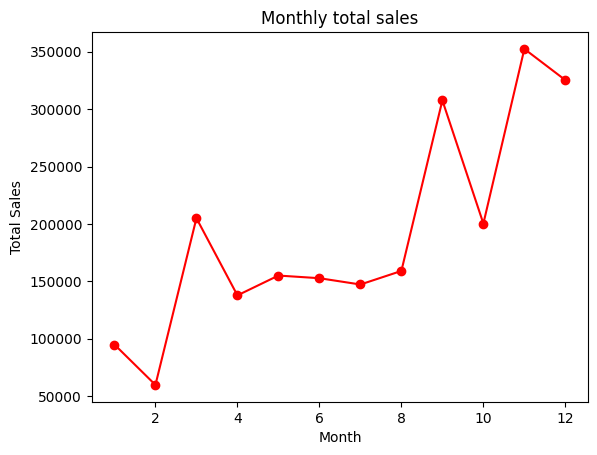

Quater
1    261.206664
2    210.146047
3    219.339802
4    237.446609
Name: Sales, dtype: float64


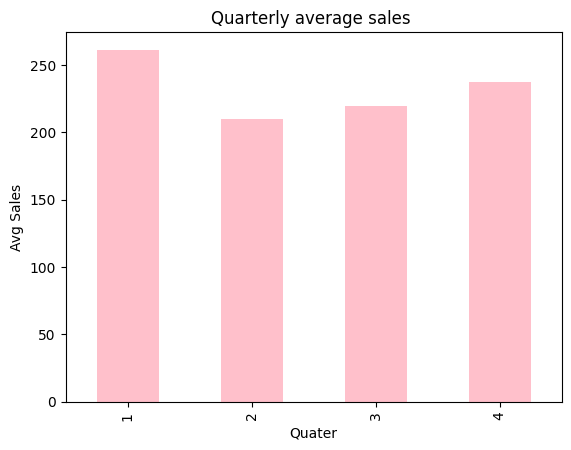

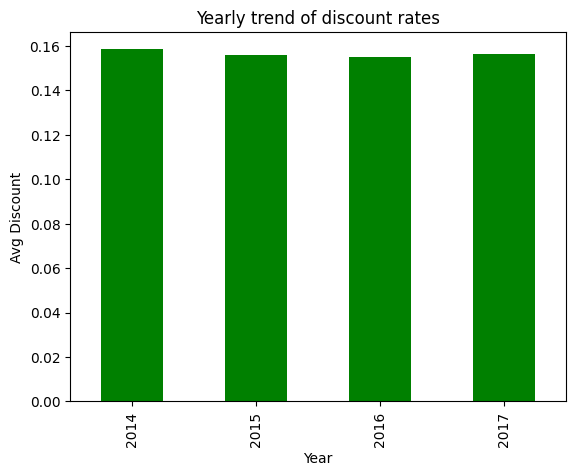

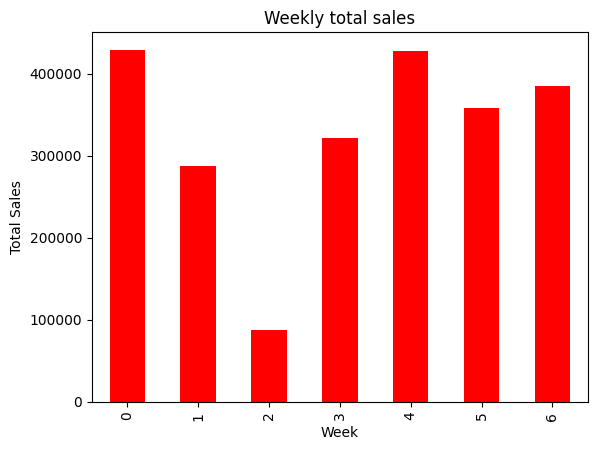

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
# 🔹 Time Series Analysis
# Using Order Date, plot:

# Set Order Date as index and resample weekly. Plot:

# 7-day rolling average of sales
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Month"]=df["Order Date"].dt.month
df["Quater"]=df["Order Date"].dt.quarter
df["Year"]=df["Order Date"].dt.year
df["Week"]=df["Order Date"].dt.weekday
# Monthly total sales (line chart)
monthlysales=df.groupby("Month")["Sales"].sum()
print(df)
# print(monthlysales)
monthlysales.plot(kind="line",marker="o",color="red")
plt.ylabel("Total Sales")
plt.title("Monthly total sales")
plt.show()

# Quarterly average sales (bar chart)
quaterly=df.groupby("Quater")["Sales"].mean()
print(quaterly)
quaterly.plot(kind="bar",color="pink")
plt.ylabel("Avg Sales")
plt.title("Quarterly average sales ")
plt.show() # if not used then 1 graph aata hai 1 nahi ambiguity is there when not used expliciyely
# Yearly trend of discount rates
df.groupby("Year")["Discount"].mean().plot(kind="bar",color="green")
plt.title("Yearly trend of discount rates")
plt.ylabel("Avg Discount")

plt.show()
# Weekly total sales
weeksales=df.groupby("Week")["Sales"].sum()
weeksales.plot(kind="bar",color="red")
plt.title("Weekly total sales")
plt.ylabel("Total Sales")
plt.show()

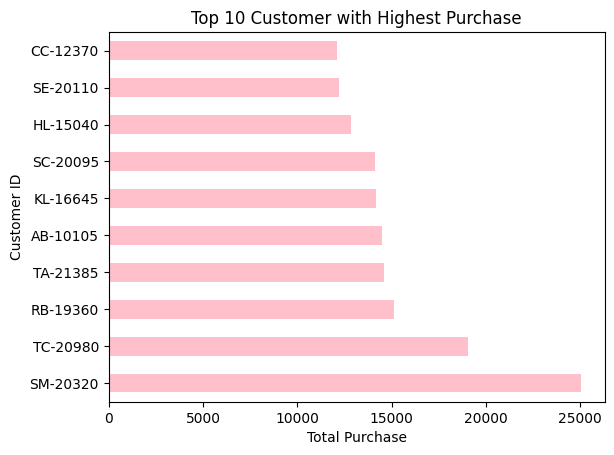

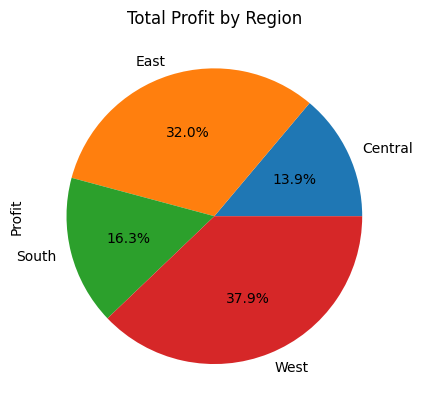

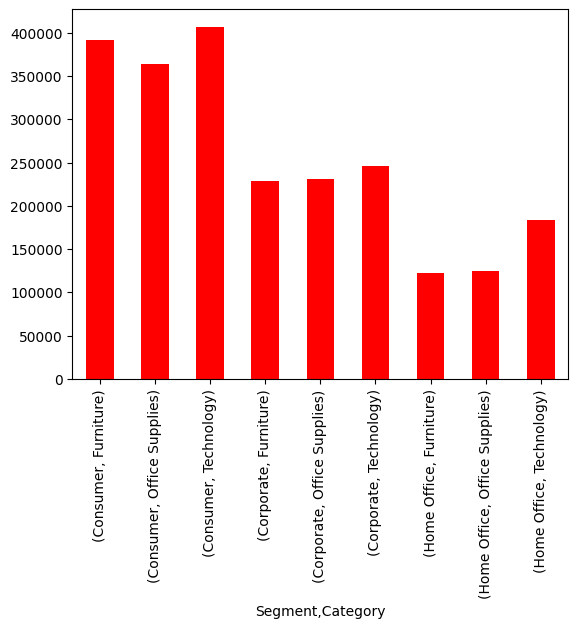

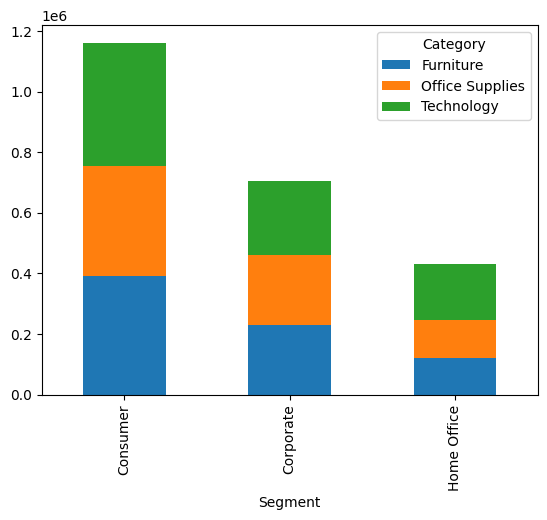

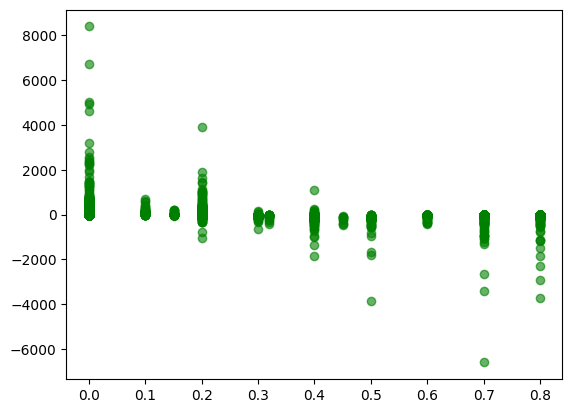

<Axes: title={'center': 'Sales'}, xlabel='Segment'>

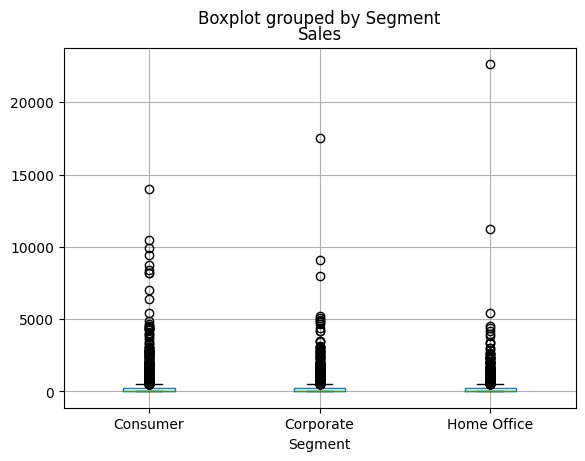

In [96]:
# 🔹 Plotting
import matplotlib.pyplot as plt
# Create a horizontal bar chart of:
# Top 10 customers by total purchases.
df.groupby("Customer ID")["Sales"].sum().sort_values(ascending=False).head(10).plot(kind="barh",color="pink")
plt.title("Top 10 Customer with Highest Purchase")
plt.xlabel("Total Purchase")
plt.show()
# Show a pie chart of total profit by region (add autopct to show percentage).
df.groupby("Region")["Profit"].sum().plot(kind="pie",autopct="%1.1f%%")
plt.title("Total Profit by Region")
plt.show()
# Plot a stacked bar chart comparing sales across Segment and Category.
df.groupby(["Segment","Category"])["Sales"].sum().plot(kind="bar",stacked=True,color="red")
# this wil; bring category and segment at the x axis we need to unsatck it as it is a multiindex data
df.groupby(["Segment","Category"])["Sales"].sum().unstack().plot(kind="bar",stacked=True,)

plt.show()
# Use a scatter plot to visualize the relationship between Discount and Profit.
plt.scatter(df["Discount"], df["Profit"], alpha=0.6, color='green')
plt.show()
# use a box plot to show the distribution of Sales across different Categories.
# df.plot(kind="box",x=df["Segment"],y=df["Sales"])# this is wrong syntax
df.boxplot(column='Sales', by='Segment')
